In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sys
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("DataSets/car_dataset.csv")

data.columns = data.columns.str.replace("_"," ")

del data["Car Name"]

data = pd.DataFrame(data,columns=["Year","Selling Price","Kms Driven","Fuel Type","Seller Type","Transmission","Owner","Present Price"])

In [3]:
def showgraph(colname):
    plt.figure(figsize=(10,10))

    plt.subplot(1,2,1)

    plt.bar(data[colname].value_counts().index,data[colname].value_counts(),label=data[colname].value_counts().index)

    plt.xticks(data[colname].value_counts().index.sort_values(ascending=True),rotation="vertical")

    plt.subplot(1,2,2)

    plt.pie(data[colname].value_counts(),autopct="%.2f",explode=16*[0.2],labels=data[colname].value_counts().index)

    plt.legend()

    plt.show()
    

def showvil(colname1,colname2):
    
    plt.figure(figsize=(10,10))

    plt.subplot(1,2,1)

    sys.violinplot(y=colname1,x=colname2,data=data)

    plt.subplot(1,2,2)

    plt.pie(data[colname2].value_counts(),explode=data[colname2].unique().size*[0.1],autopct="%.2f",labels=data[colname2].value_counts().index)

    plt.legend()

    plt.show()
    


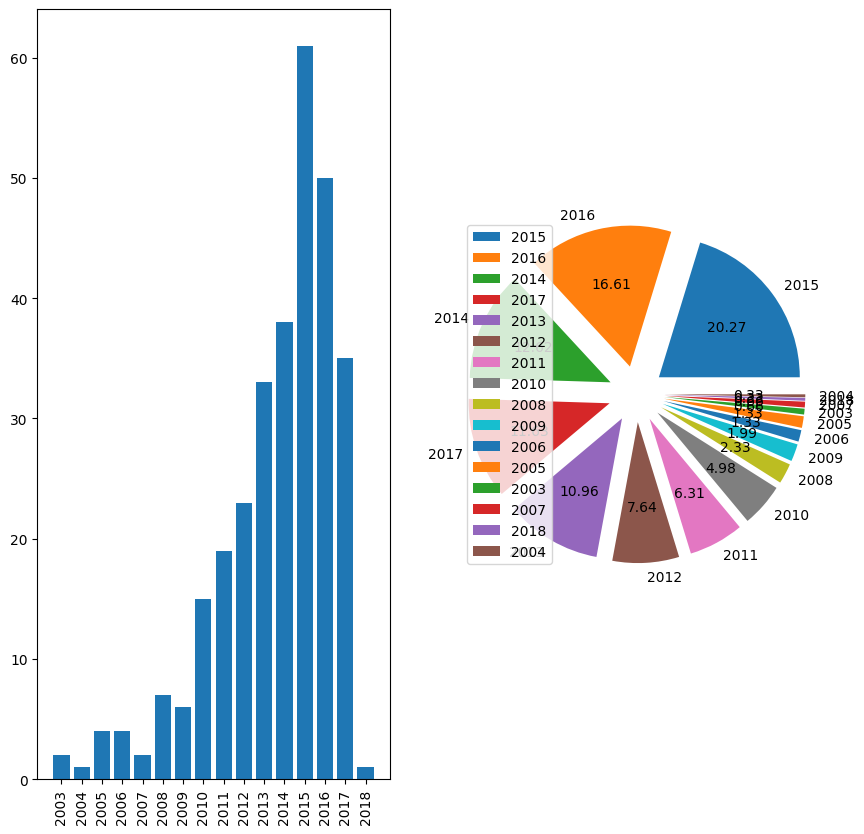

In [4]:
showgraph("Year")

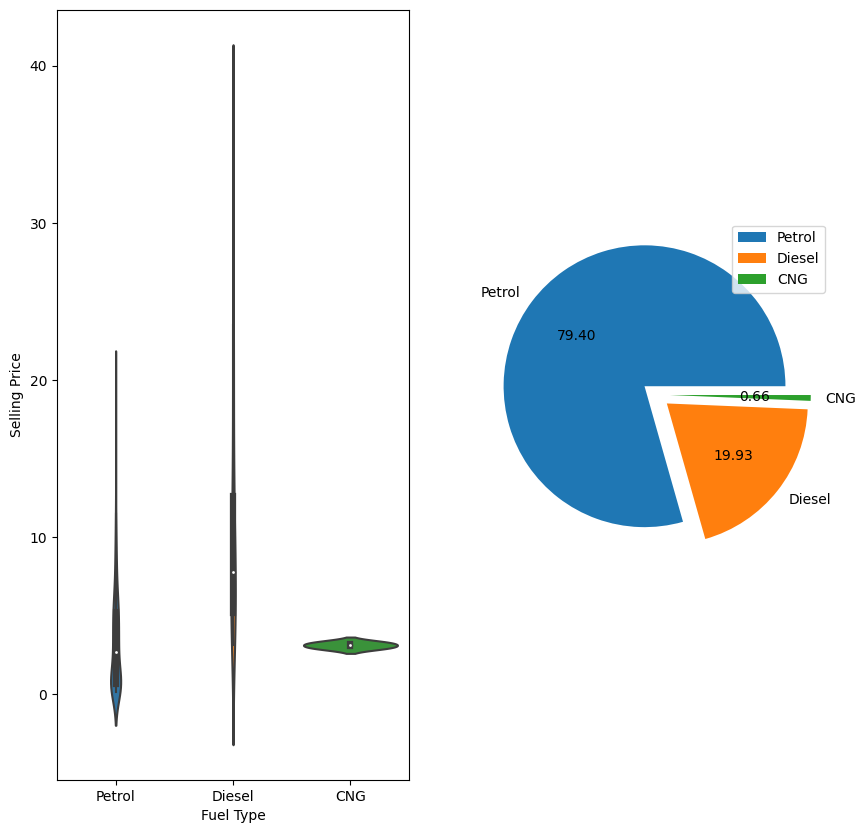

In [5]:
showvil("Selling Price","Fuel Type")

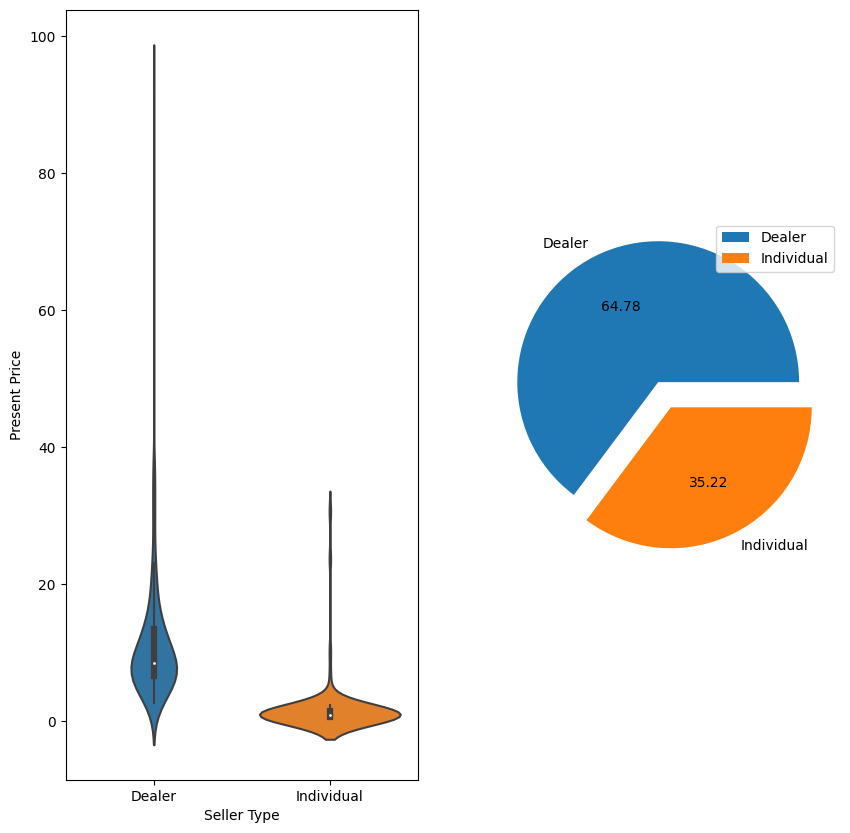

In [6]:
showvil("Present Price","Seller Type")

C:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


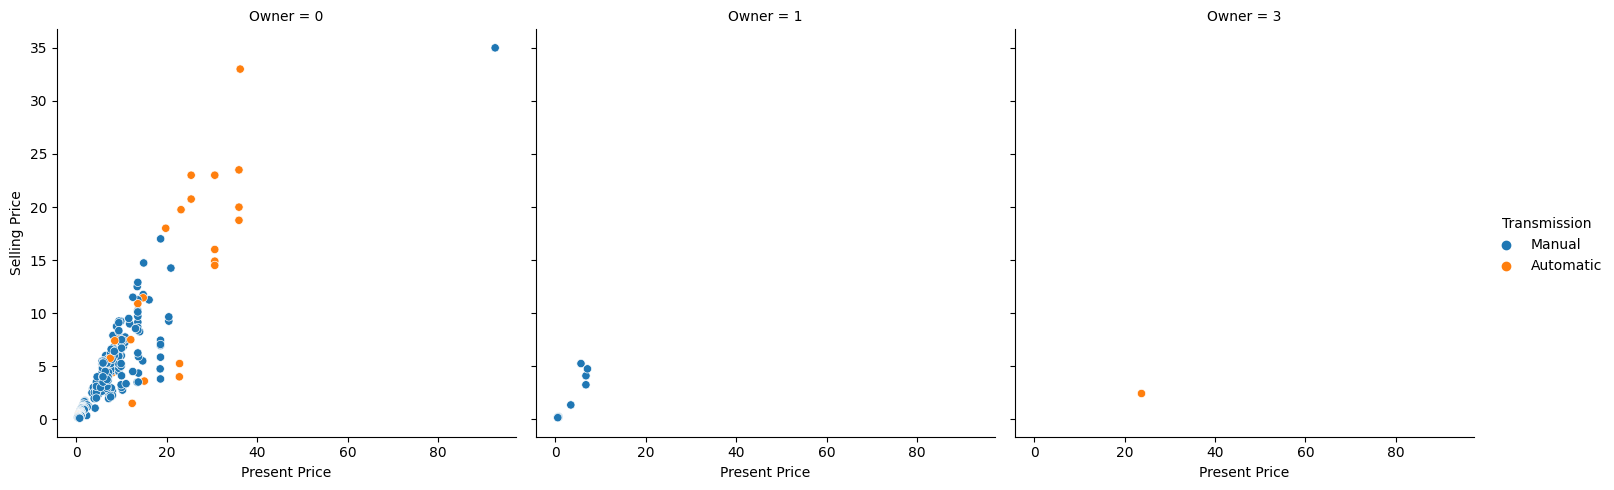

In [7]:
sys.relplot(x="Present Price",y="Selling Price",col="Owner",hue="Transmission",data=data)
plt.show()

In [8]:

for i in ["Selling Price","Present Price"]:
    
    data[i] = StandardScaler().fit_transform(data[[i]])

X = data["Selling Price"].to_numpy().reshape(-1,1)

Y = data["Present Price"].to_numpy().reshape(-1,1)

Xtrain ,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)

model = LinearRegression()

model.fit(Xtrain,Ytrain)

prediction = model.predict(Xtest)

acc = model.score(prediction,Ytest)



0.7419820562160481